## MultiLayer Perceptron/ Feed Forward Architecture
### Implementing a 3 Layer Architecture  from Scratch!

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons,make_circles,make_classification

## Dataset Prepartaion

In [2]:
dataset = 'xor'

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

In [3]:
X,Y = load_dataset(dataset)
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


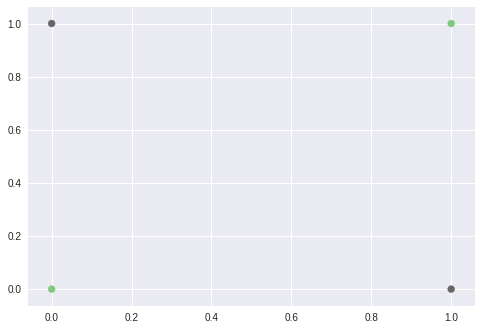

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

plt.show()

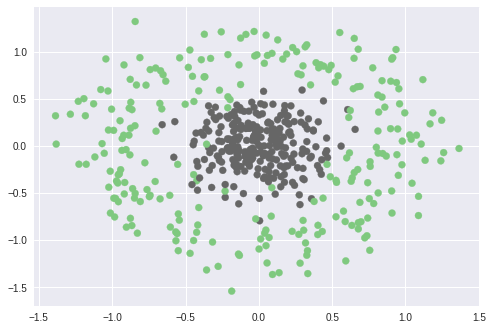

In [5]:
X,Y = make_circles(n_samples=500,noise=0.2,factor=0.2)

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

plt.show()

## Model Architecture

In [6]:
# Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd Layer
output_size = 2 #no_of_outputs

In [7]:
def softmax(a):
    e_pa = np.exp(a) # Vector
    ans = e_pa/np.sum(e_pa, axis=1, keepdims=True)
    return ans

In [8]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
       

In [9]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    
    return y_oht

In [10]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [11]:
model.forward(X).shape

(500, 2)

In [12]:
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [13]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,1))
            
    return training_loss

In [14]:
train(X,Y,model,500,0.001)

Epoch 0 Loss 1.0000
Epoch 1 Loss 1.0000
Epoch 2 Loss 1.0000
Epoch 3 Loss 1.0000
Epoch 4 Loss 1.0000
Epoch 5 Loss 1.0000
Epoch 6 Loss 1.0000
Epoch 7 Loss 1.0000
Epoch 8 Loss 1.0000
Epoch 9 Loss 1.0000
Epoch 10 Loss 1.0000
Epoch 11 Loss 1.0000
Epoch 12 Loss 1.0000
Epoch 13 Loss 1.0000
Epoch 14 Loss 1.0000
Epoch 15 Loss 1.0000
Epoch 16 Loss 1.0000
Epoch 17 Loss 1.0000
Epoch 18 Loss 1.0000
Epoch 19 Loss 1.0000
Epoch 20 Loss 1.0000
Epoch 21 Loss 1.0000
Epoch 22 Loss 1.0000
Epoch 23 Loss 1.0000
Epoch 24 Loss 1.0000
Epoch 25 Loss 1.0000
Epoch 26 Loss 1.0000
Epoch 27 Loss 1.0000
Epoch 28 Loss 1.0000
Epoch 29 Loss 1.0000
Epoch 30 Loss 1.0000
Epoch 31 Loss 1.0000
Epoch 32 Loss 1.0000
Epoch 33 Loss 1.0000
Epoch 34 Loss 1.0000
Epoch 35 Loss 1.0000
Epoch 36 Loss 1.0000
Epoch 37 Loss 1.0000
Epoch 38 Loss 1.0000
Epoch 39 Loss 1.0000
Epoch 40 Loss 1.0000
Epoch 41 Loss 1.0000
Epoch 42 Loss 1.0000
Epoch 43 Loss 1.0000
Epoch 44 Loss 1.0000
Epoch 45 Loss 1.0000
Epoch 46 Loss 1.0000
Epoch 47 Loss 1.0000
Ep

Epoch 435 Loss 1.0000
Epoch 436 Loss 1.0000
Epoch 437 Loss 1.0000
Epoch 438 Loss 1.0000
Epoch 439 Loss 1.0000
Epoch 440 Loss 1.0000
Epoch 441 Loss 1.0000
Epoch 442 Loss 1.0000
Epoch 443 Loss 1.0000
Epoch 444 Loss 1.0000
Epoch 445 Loss 1.0000
Epoch 446 Loss 1.0000
Epoch 447 Loss 1.0000
Epoch 448 Loss 1.0000
Epoch 449 Loss 1.0000
Epoch 450 Loss 1.0000
Epoch 451 Loss 1.0000
Epoch 452 Loss 1.0000
Epoch 453 Loss 1.0000
Epoch 454 Loss 1.0000
Epoch 455 Loss 1.0000
Epoch 456 Loss 1.0000
Epoch 457 Loss 1.0000
Epoch 458 Loss 1.0000
Epoch 459 Loss 1.0000
Epoch 460 Loss 1.0000
Epoch 461 Loss 1.0000
Epoch 462 Loss 1.0000
Epoch 463 Loss 1.0000
Epoch 464 Loss 1.0000
Epoch 465 Loss 1.0000
Epoch 466 Loss 1.0000
Epoch 467 Loss 1.0000
Epoch 468 Loss 1.0000
Epoch 469 Loss 1.0000
Epoch 470 Loss 1.0000
Epoch 471 Loss 1.0000
Epoch 472 Loss 1.0000
Epoch 473 Loss 1.0000
Epoch 474 Loss 1.0000
Epoch 475 Loss 1.0000
Epoch 476 Loss 1.0000
Epoch 477 Loss 1.0000
Epoch 478 Loss 1.0000
Epoch 479 Loss 1.0000
Epoch 480 

[]

## Summary

In [15]:
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


## Visualisation

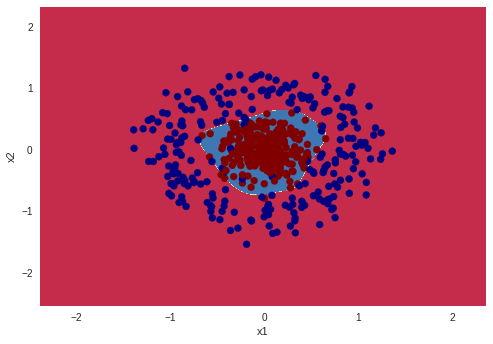

In [16]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [17]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


Training Accuracy 100.0000
Training Accuracy 96.2000
Training Accuracy 97.8000
Training Accuracy 96.8000


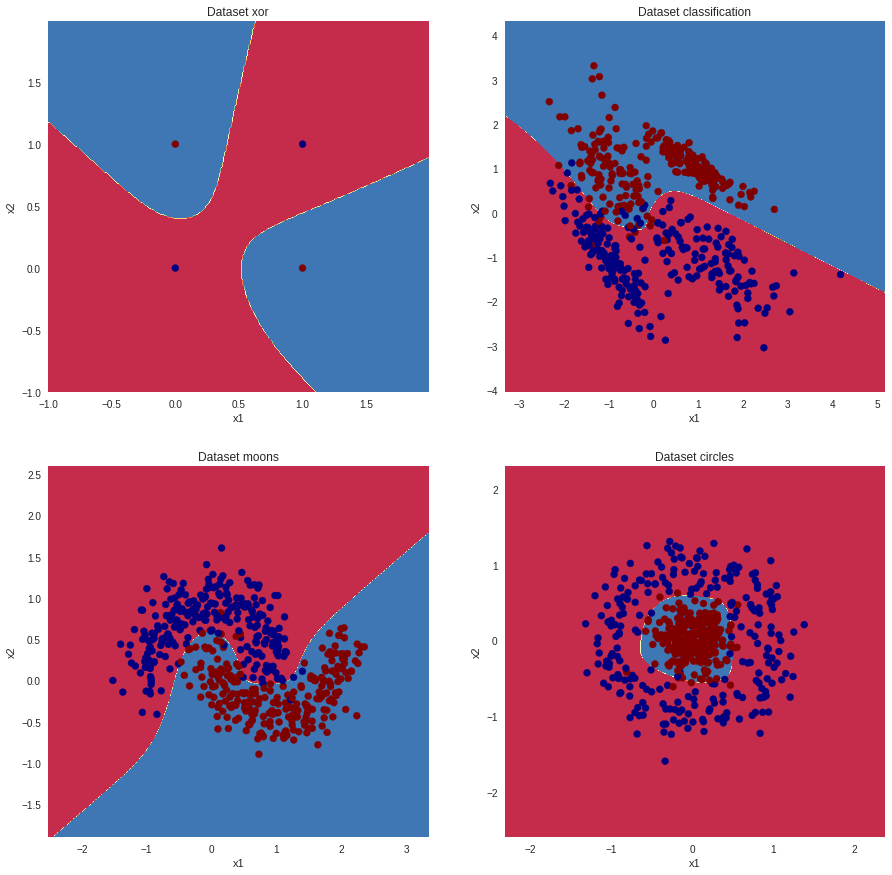

In [18]:
datasets = ["xor","classification","moons","circles"]

id = 1
plt.figure(figsize=(15,15))
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy %.4f"%(training_accuracy*100))
    
    no = 220+id
    
    plt.subplot(no)
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    id +=1

plt.show()